# **Traffic Sign Detection and Recognition**

**Group name** = RARroad

The project is based on the concept of introducing Road Awareness in Smart cars using Raspberry pi. 

RARroad is a deeplearning based system that will assist the driver as road awareness is added in the rover using Deep learning algorithmsimplemented on raspberry pi. This will be implemented on on a line following rover as a proof of concept.

In [ ]:
from google.colab import drive

## Clonning Traffic sign dataset

The TrafficSign_Dataset repository contains the prepared dataset and the required code files which will be further needed.

The dataset is present in image folder and the labelsare prsent in Labels folder. The labels are present in the text files which are manualy made by us.
 

In [ ]:
"""
cloning the repository will help us access all the files present in the repository without 
having them to download from the drive or device
"""

!git clone https://github.com/AreebaNasir/TrafficSign_Dataset.git

Cloning into 'TrafficSign_Dataset'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 685 (delta 42), reused 0 (delta 0), pack-reused 610
Receiving objects: 100% (685/685), 106.72 MiB | 48.46 MiB/s, done.
Resolving deltas: 100% (42/42), done.


## Downloading yolo weights

Download YOLOv3 weights from YOLO website https://pjreddie.com/darknet/yolo/

In [ ]:
"""
The following command will download the weights directly in the colab notebook without taking to the website
"""

!wget https://pjreddie.com/media/files/yolov3.weights

## Clonning keras-yolo3 Repository

Clonning the qqwweee repository from github for the implementation of object detection with the help of yolov3. The qqwweee impementation of yolo is based on coco dataset and we will further retrain it for our german traffic sign dataset.


In [ ]:
"""
A Keras implementation of YOLOv3 (Tensorflow backend)
"""

!git clone https://github.com/qqwweee/keras-yolo3.git

Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 151.07 KiB | 25.18 MiB/s, done.
Resolving deltas: 100% (65/65), done.


### Converting darknet yolo model to keras model

The YOLO weights downloaded are from the darknet website for yolo weights. We have based our project on the keras implementation of YOLO as darknet implemetation is very complicated. 

In [ ]:
"""
Below is the conversion of the darknet model based on coco dataset to keras model based on our dataset. the conversion
is important to get a model that will give us detected traffic signs in an input image  
"""

!python keras-yolo3/convert.py keras-yolo3/yolov3.cfg yolov3.weights keras-yolo3/model_data/yolo_weights.h5	# to get yolo.h5(model)

2020-12-10 09:15:07.918535: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
2020-12-10 09:15:09.644235: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-12-10 09:15:09.706095: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-12-10 09:15:09.706927: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2020-12-10 09:15:09.706979: I tenso

In [ ]:
"""
For accessing the files from google drive i.e. saved trained model with maximum accuracy 
"""

# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
"""
The model was trained multiple times, the model generated at the end providing us with the maximum accuracy was 
saved in the drive to be accessed for the prediction of new incoming images. This will prevent us from 
training the model for long time, whenever a new session is started. 
"""

downloaded = drive.CreateFile({'id':'1qObBIkVEg_5XdWyoNmD8Fu0MYUqeAAuL'}) # replace the id with id of file you want to access
downloaded.GetContentFile('weights_fifteen_final.h5') 

In [ ]:
%tensorflow_version 1.x  #tensorflow version 1.x is required specifically

TensorFlow 1.x selected.


In [ ]:
import tensorflow
print(tensorflow.__version__)

1.15.2


In [ ]:
!pip install q keras==2.1.5

  Using cached https://files.pythonhosted.org/packages/ba/65/e4aff762b8696ec0626a6654b1e73b396fcc8b7cc6b98d78a1bc53b85b48/Keras-2.1.5-py2.py3-none-any.whl
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
from tensorflow.python import keras
print(keras.__version__)

2.2.4-tf


## Retrain model to TrafficSignDataset

Retraining a Pre-trained model i.e. YOLOv3 to create a model that wi detect and recognize traffic signs. The model is initially pre-trained on the COCO dataset, and retraining it using our German Traffic Sign Detection Dataset is what we are doing below.

In [ ]:
!python keras-yolo3/train.py -a TrafficSign_Dataset/train.txt -c TrafficSign_Dataset/classes.txt -o keras-yolo3/model_data/trafficsign_yolo.h5

Using TensorFlow backend.








2020-12-21 06:33:16.608150: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2020-12-21 06:33:16.608341: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2be8a00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-12-21 06:33:16.608375: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-12-21 06:33:16.610230: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-12-21 06:33:16.742451: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-12-21 06:33:16.743099: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2be8f40 initialized for platform CUDA (this does not guarantee that XLA will be u

## Testing model on TrafficSignDataset

Predicting the labels of traffic signs present in the test image.

We will have to input an image with or without traffic sign. The model will detect the sign if present and return the label of the signs present. Our model will detect 4 signs, rest of the signs will be labeled as others. This is because dataset has been prepared by us and 43 classes are reduced to 5 classes. The classes are:
1. Speed Sign 30
2. Speed Sign 50
3. Yield Sign
4. Stop Sign
5. Other

The returned result contains the **label** of the detected sign, the **confidence score** and the **values of the bounded box** where the sign is actually present. If there are multiple signs in a particular image, each sign will be predicted with high accuracy.

In [ ]:
!python keras-yolo3/yolo_video.py --image

Using TensorFlow backend.
Image detection mode
 Ignoring remaining command line arguments: ./path2your_video,



2020-12-21 07:01:15.468374: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2020-12-21 07:01:15.468587: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x242ca00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-12-21 07:01:15.468630: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-12-21 07:01:15.470317: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-12-21 07:01:15.609534: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-12-21 07:01:15.610237: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x24

#### Bounded Boxes on Signs

The x and y values of the bounded boxes returned above are tested below to show whether the sign detected is at the same place at which it actually is present. The results show that the placement is exactly the same as where the actual sign is present. 

Below are the example of 3 images on which we tested the returned bounded boxes values of the respective images, the output highlights the position of signs that was predicted by the our model. 

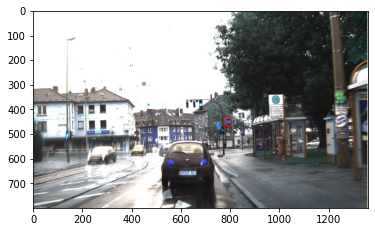

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2

image=cv2.imread("00548.jpg")
startX=776
startY=431
endX=804
endY=468
# draw a bounding box around the detected result and display the image
cv2.rectangle(image, (startX, startY), (endX, endY), (255, 0, 0), 2)
plt.imshow(image)


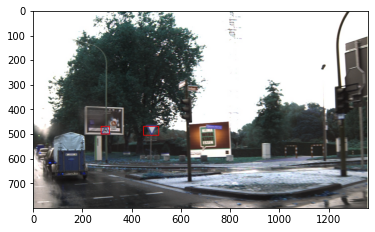

In [ ]:

image=cv2.imread("00557.jpg")
startX=276
startY=468
endX=310
endY=499
# draw a bounding box around the detected result and display the image
cv2.rectangle(image, (startX, startY), (endX, endY), (255, 0, 0), 2)
startX=448
startY=468
endX=510
endY=504
cv2.rectangle(image, (startX, startY), (endX, endY), (255, 0, 0), 2)
plt.imshow(image)


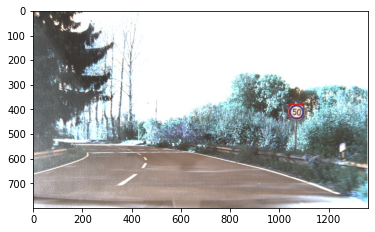

In [ ]:

image=cv2.imread("00625.jpg")

startX=1039
startY=379
endX=1098
endY=433
cv2.rectangle(image, (startX, startY), (endX, endY), (255, 0, 0), 2)
plt.imshow(image)


In [ ]:
import cv2
cv2.__version__

'4.1.2'